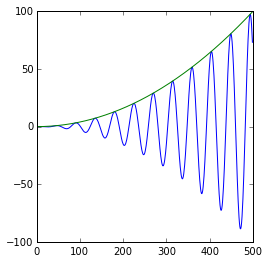

In [1]:
%matplotlib inline
from okean import vis
import numpy as np

# create main dataset:
t=np.arange(0,10,.02)
y=np.cos(7*t)*t**2
o=vis.Data(v=y)

# add some extra data to plot:
o.extra+=[vis.Data(v=t**2)]

o.plot(figsize=(4,4))

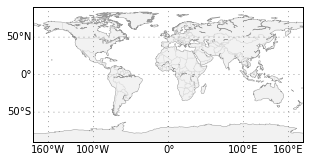

In [2]:
o=vis.Data()
o.plot(proj=1,figsize=(5,5),axis=(-180,180,-90,90))

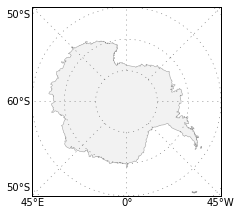

In [3]:
o=vis.Data()
o.plot(proj=1,figsize=(3.5,3.5),proj__name='spstere',
       proj__options=dict(boundinglat=-60,lon_0=0))

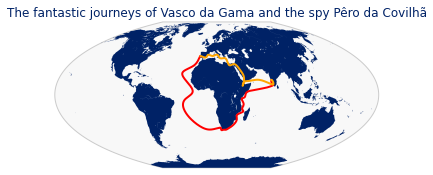

In [4]:
o=vis.Data()

# map settings:
opts={}
opts['meridians_add']=0
opts['parallels_add']=0
opts['countries_add']=0
opts['oceans_add']=1
opts['continents']=dict(color='#002266')
opts['oceans']=dict(color='#cccccc',fill_color='#f8f8f8')
opts['coast_add']=0
opts['proj.name']='mbtfpq'

# add some interesting trajectories you never heard about:
i=np.load('/home/mma/Desktop/OKEAN_devel_files/da_gama_full_289.npz')
da_gama=vis.Data(x=i['xx'][:289],v=i['yy'][:289])
da_covilha=vis.Data(x=i['xx'][289:],v=i['yy'][289:])

da_gama.set_param(d1_line__options=dict(color='r',lw=2))
da_covilha.set_param(d1_line__options=dict(color='orange',lw=2))
o.extra+=[da_gama,da_covilha]

# plot:
o.plot(proj=1,figsize=(6,6),**opts)
o.ax.set_title(u'The fantastic journeys of Vasco da Gama and the spy Pêro da Covilhã',
               color='#002266');

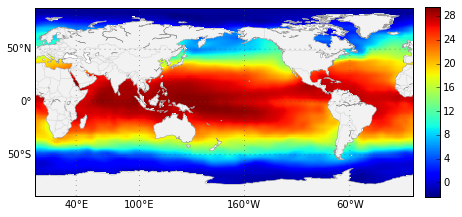

In [10]:
f='http://iridl.ldeo.columbia.edu/SOURCES/.LEVITUS94/dods '
from okean import netcdf
x=netcdf.use(f,'X')
y=netcdf.use(f,'Y')
v=netcdf.use(f,'ANNUAL.temp',Z=0)
o=vis.Data(x,y,v)
o.plot(figsize=(7,3.3))
#netcdf.show(f)

(75,) (33,) (33, 75)
40.5


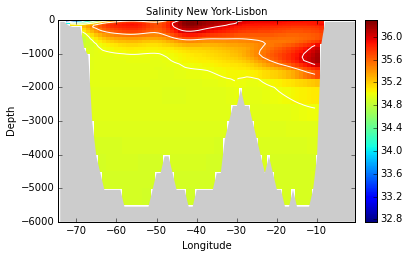

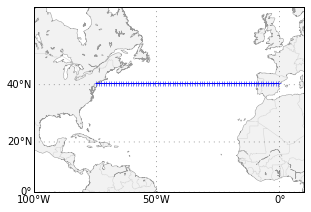

In [11]:
#o=vis.Data(v=v)
#o.plot()
#o=vis.Data(v=v[135,270:])
#o.plot()

yi=130
u=netcdf.use(f,'ANNUAL.sal',X='285:',Y=yi)
xx=netcdf.use(f,'X',X='285:',Y=yi)-360
yy=netcdf.use(f,'Y',X='285:',Y=yi)
#print yy,xx
z=netcdf.use(f,'Z')
print xx.shape,z.shape,u.shape
o=vis.Data(x=xx,y=-z,v=u)
o.info['x']['name']='Longitude'
o.info['y']['name']='Depth'
o.info['v']['name']='Salinity New York-Lisbon'

h=np.zeros(xx.size)
for i in range(len(h)):
    k=np.where(u.mask[:,i])[0]
    if k.size:
        h[i]=z[k[0]]
    else:
        h[i]=z[-1]
        
p=vis.Data(x=xx+(xx[1]-xx[0])/2,v=-h-50)
p.config['d1.plot']='fill_between'
o.extra+=[p]

q=vis.Data(x=xx,y=-z,v=u)
q.set_param(field__plot='contour',field__linecolors='w',cvals=np.arange(32,37,.5))
o.extra+=[q]

o.plot(figsize=(5.5,3.5))
o.ax.set_xlim(xx.min(),xx.max())
#netcdf.show(f)           
    
#q=u.mask[:-1]-u.mask[1:]
#q=q.astype('i')
#print np.where(q==-1),q.min(),q.max()
r=vis.Data(x=xx,v=xx*0+yy)
r.plot(proj=1,figsize=(5,5),axis=(-100,10,0,60),
       d1_line__options=dict(marker='+',ms=5))
print yy

/home/mma/software/anaconda/lib/python2.7/site-packages/okean/vis.py:526: RuntimeWarning: invalid value encountered in sqrt
  C=np.sqrt(u[m]**2+v[m]**2)
/home/mma/software/anaconda/lib/python2.7/site-packages/okean/vis.py:536: RuntimeWarning: invalid value encountered in sqrt
  if U=='auto': U=2*ticks.nicenum(np.sqrt(u**2+v**2).mean(),1)


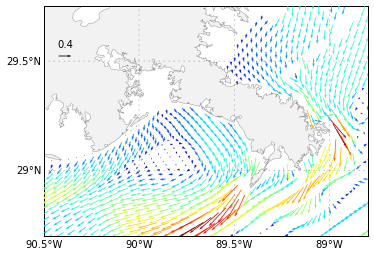

In [12]:
def load_data(s=-1,it=20):
    f='/home/mma/Desktop/OKEAN_devel_files/mch_his.nc4'
    from okean import netcdf, vis, calc

    u=netcdf.use(f,'u',s_rho=s,ocean_time=it)
    v=netcdf.use(f,'v',s_rho=s,ocean_time=it)
    x=netcdf.use(f,'lon_psi')
    y=netcdf.use(f,'lat_psi')
    u=(u[1:]+u[:-1])/2.
    v=(v[:,1:]+v[:,:-1])/2.

    ang=netcdf.use(f,'angle')
    ang=(ang[:-1]+ang[1:])/2.
    ang=(ang[:,:-1]+ang[:,1:])/2.
    u,v=calc.rot2d(u,v,-ang)
    return x,y,u,v
      
x,y,u,v=load_data()
from okean import vis
o=vis.Data(x=x,y=y,v=(u,v))

o.config['axes.axis']=-90.5,-88.8,28.7,29.75
o.config['vfield.dij']=2,1
o.config['proj.resolution']='h'
o.config['vfield.C']='speed'
o.config['vfield.key_XYU']=.15,.65,'auto'
o.config['vfield.options']=dict(units='width',scale=10,zorder=1e3)
o.plot(figsize=(6,6))

In [ ]:
TODO: adicionar exemplo de vectores!!
    2- pq ha um xlabel "Unk" no grafico acima!!?? creio q pq nao é extra! 
    a projeccao foi forçada !
    3- cortar na long para acabar perto de lisboa!
    4- posso centrar os graficos!?

In [ ]:
opts={}
opts['meridians_add']=0
opts['parallels_add']=0
opts['countries_add']=0
opts['oceans_add']=1
opts['continents_add']=1
opts['continents']=dict(color='#002266')
opts['oceans']=dict(color='#cccccc',fill_color='#f8f8f8')
opts['coast_add']=0
opts['proj.name']='mbtfpq'

#o.x,o.v=o.map.shiftdata(o.x,o.v)
opts['field.plot']='contour'
# opts['colorbar.ax_position']=0.875,0.35,0.03,0.3 # for vertical cb
opts['colorbar.ax_position']=0.225,0.275,0.5,0.03
o.plot(proj=1,figsize=(6,6),**opts)
s1=netcdf.vatt(f,'ANNUAL.temp','long_name')
s2=netcdf.vatt(f,'ANNUAL.temp','units')
o.cb.set_label('%s (%s)'%(s1,s2))